In [127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use("dark_background")


In [128]:
df =  pd.read_csv("student_scores.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


In [129]:
# gives information about the data that contains numeric values
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [183]:
# to check how many values are null
# for the students subjects marks : maths,etc they got no null values  s o we don't need to fill them
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [132]:
# df[""]

# Dropping the unnamed column
axis-1 is vertical axis

In [133]:
# removing complete col for df of unnamed
# df = df.drop("Unnamed: 0", axis=1)
# df = df.drop("Unnamed: 0", axis=1)
# df

# Changing Weekly Study Hours Column 
As we get some bad values there


In [134]:
# changing 5 oct bad values 
# data clean for a column -- that contains bad values 
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("10-May","5-10")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-10,82,90,93


# Analysis
Check The gender distribution

[Text(0, 0, '15424'), Text(0, 0, '15217')]
<BarContainer object of 2 artists>


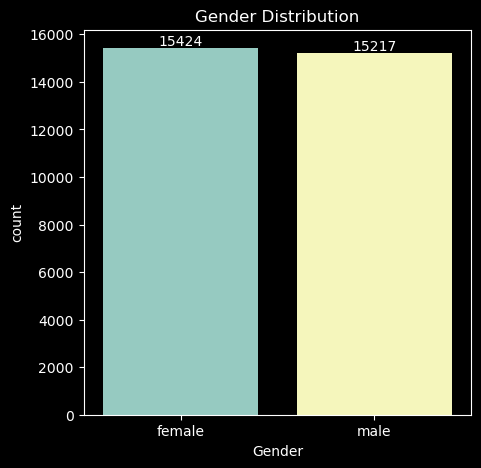

In [135]:
# setting figure size
plt.figure(figsize=(5,5))

# first of all before analysis we're checking gender distribution : male , female
ax = sns.countplot(x = "Gender", data=df)

# for exact count
# ax.containers[0]: The ax object represents the plot, and ax.containers is a list containing the elements of the plot. ax.containers[0] corresponds to the bars in the countplot

print(ax.bar_label(ax.containers[0]))
plt.title("Gender Distribution")
print(ax.containers[0])
plt.show()

In [136]:
# from the above chart we can analyze that the no. of females in the data is more than the number of males


# Impact of Parent Education on the scores of students

In [137]:
# firstly we'll create a group by 
# the result got the aggregate -- mean for parents education and there students scores.
# the analysis we got is those whose parents ar educated are likely to get more marks than others
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


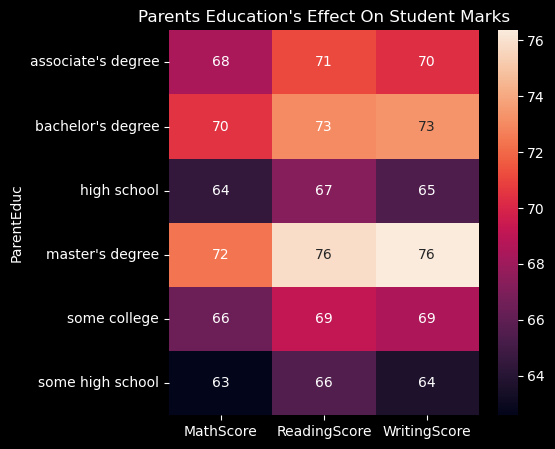

In [187]:
# plotting graph for above analysis using heatmap
# so the graph shows that the students whose parents are educated or got master's level degree they ussually get nore marks or likely there avg marks are far good         
# annot is used for showing values on the heat-map
plt.figure(figsize=(5,5))
plt.title("Parents Education's Effect On Student Marks")
sns.heatmap(gb,annot=True)
plt.show()

# Impact of Parent Marital Status on the scores of students

In [188]:
pms = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(pms)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


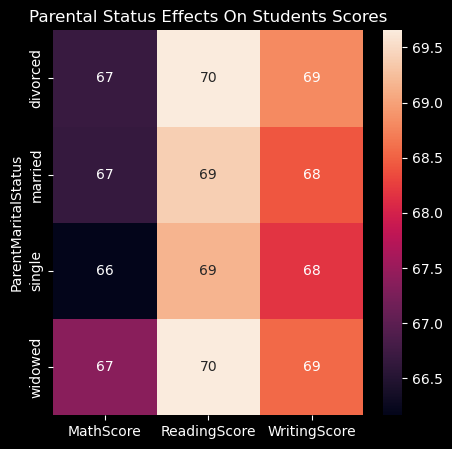

In [189]:
# so we can conclude that for this data there is not much imopact of parent's marital status on student education except for single 
plt.figure(figsize=(5,5))
plt.title("Parental Status Effects On Students Scores")
sns.heatmap(pms,annot=True)
plt.show()

In [190]:
# Impact Of Number Of Siblings On The Student's Score

Axes(0.125,0.11;0.775x0.77)


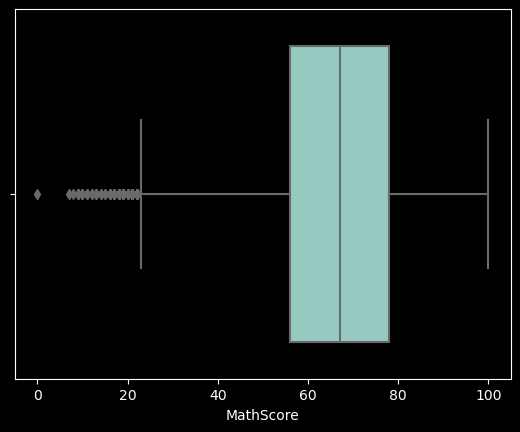

In [191]:
# We can see the black lines they are outliers -- extream values
# Outliers are left over we get after particular range of values we have for it 
print(sns.boxplot(data=df , x="MathScore"))


Axes(0.125,0.11;0.775x0.77)


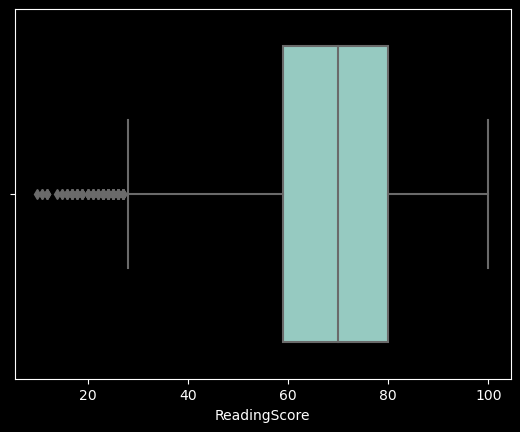

In [192]:
print(sns.boxplot(data=df , x="ReadingScore"))


Axes(0.125,0.11;0.775x0.77)


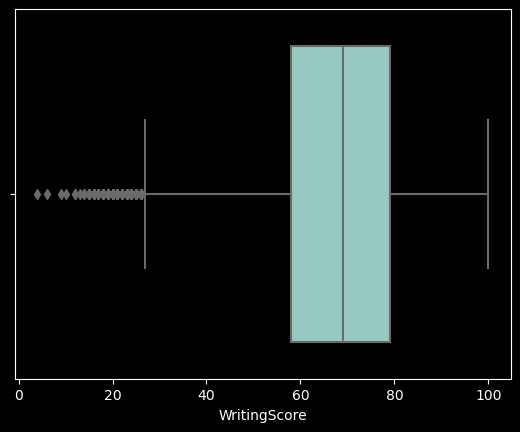

In [193]:
print(sns.boxplot(data=df , x="WritingScore"))

In [194]:
# for the above 3 graphs we can conclude that the marks in maths is comparatively low from all subjects

# Distribution Of Ethnic Group
Analyzing wrt ethnic group
We are using it for percentage distribution by using pychart

In [195]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [196]:
# for counts we can use pandas loc function

# Here we got the dataframe only for those students whose ethnic group is group A -- we are getting their count
groupA = df.loc[(df["EthnicGroup"]=="group A")].count()
groupB = df.loc[(df["EthnicGroup"]=="group B")].count()
groupC = df.loc[(df["EthnicGroup"]=="group C")].count()
groupD = df.loc[(df["EthnicGroup"]=="group D")].count()
groupE = df.loc[(df["EthnicGroup"]=="group E")].count()
print(groupA)
print()
print(groupB)
print()
print(groupC)
print()
print(groupD)
print()
print(groupE)

# groupA = df.loc[(df["EthnicGroup"]=="group A")].count
# print(groupA)


Unnamed: 0             2219
Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64

Unnamed: 0             5826
Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64

Unnamed: 0             9212
Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType           

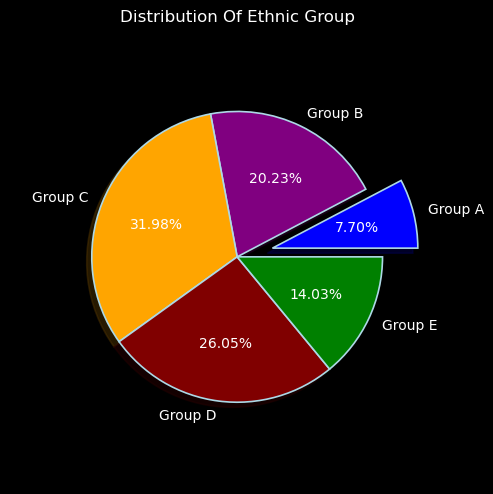

In [202]:
# Pie Chart for ethnic group distribution
# Like which group acquires how much percentage in the table i.e, which has the most percentage
plt.figure(figsize=(5.9,5.9))
egl = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]        
l = ["Group A","Group B","Group C","Group D","Group E"]
colors = ['Blue','Purple','Orange','Maroon','green']
colors1 = ["black"]
explodechart= [0.2,0,0,0,0]
plt.pie(egl,labels=l,autopct="%0.2f%%",shadow=True,explode=explodechart,colors=colors,radius=0.8,
       wedgeprops={"linewidth":1.2,"edgecolor":"lightblue"})
# plt.pie(x,labels=y,explode = exploding_chart,colors=colors, autopct="%0.2f%%",shadow=True,radius=1.0, labeldistance=1.2,startangle=90,textprops={"fontsize":8}, counterclock=False,wedgeprops={"linewidth":1.5,"edgecolor":'lightblue'})         

plt.title("Distribution Of Ethnic Group")
plt.show()

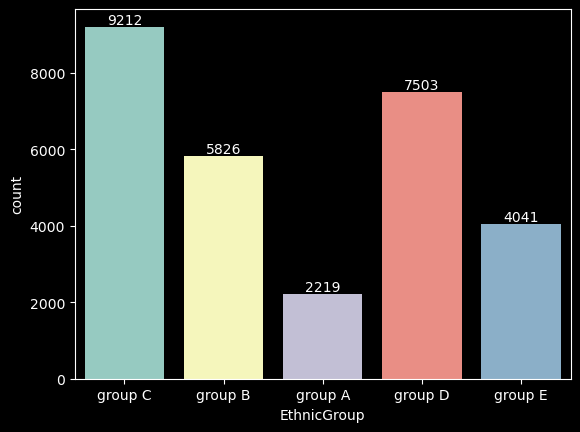

In [180]:
# Using count plot for counting them
ax = sns.countplot(data=df, x = "EthnicGroup")
# to show count on bars
ax.bar_label(ax.containers[0])
plt.show()